Loading file.

In [1]:
file = open('/content/royal_data.txt','r')
royal_data = file.readlines()
file.close()
print(royal_data)

['The future king is the prince\n', 'Daughter is the princess\n', 'Son is the prince\n', 'Only a man can be a king\n', 'Only a woman can be a queen\n', 'The princess will be a queen\n', 'The prince is a strong man\n', 'The princess is a beautiful woman\n', 'Prince is only a boy now\n', 'Prince will be king\n', 'A boy will be a man']


lowercase conversiona and removing stop words.

In [2]:
for i in range(len(royal_data)):
  royal_data[i] = royal_data[i].lower().replace('\n', '')

print(royal_data)

['the future king is the prince', 'daughter is the princess', 'son is the prince', 'only a man can be a king', 'only a woman can be a queen', 'the princess will be a queen', 'the prince is a strong man', 'the princess is a beautiful woman', 'prince is only a boy now', 'prince will be king', 'a boy will be a man']


In [3]:
stopwords = ['the', 'is','are','can','will','only','a','be','their','now','and','at','it']

filtered_data =[]

for sent in royal_data:
  temp = []
  for word in sent.split():
    if word not in stopwords:
      temp.append(word)
  filtered_data.append(temp)

print(filtered_data)


[['future', 'king', 'prince'], ['daughter', 'princess'], ['son', 'prince'], ['man', 'king'], ['woman', 'queen'], ['princess', 'queen'], ['prince', 'strong', 'man'], ['princess', 'beautiful', 'woman'], ['prince', 'boy'], ['prince', 'king'], ['boy', 'man']]


In [5]:
# creating bigrams

bigrams=[]

for ch in filtered_data:
  for i in range(len(ch) -1):
    for j in range(i+1, len(ch)):
      bigrams.append([ch[i], ch[j]])
      bigrams.append([ch[j], ch[i]])

print(bigrams)


[['future', 'king'], ['king', 'future'], ['future', 'prince'], ['prince', 'future'], ['king', 'prince'], ['prince', 'king'], ['daughter', 'princess'], ['princess', 'daughter'], ['son', 'prince'], ['prince', 'son'], ['man', 'king'], ['king', 'man'], ['woman', 'queen'], ['queen', 'woman'], ['princess', 'queen'], ['queen', 'princess'], ['prince', 'strong'], ['strong', 'prince'], ['prince', 'man'], ['man', 'prince'], ['strong', 'man'], ['man', 'strong'], ['princess', 'beautiful'], ['beautiful', 'princess'], ['princess', 'woman'], ['woman', 'princess'], ['beautiful', 'woman'], ['woman', 'beautiful'], ['prince', 'boy'], ['boy', 'prince'], ['prince', 'king'], ['king', 'prince'], ['boy', 'man'], ['man', 'boy']]


In [7]:
# vocabulary
all_words=[]  # will contain all unique words

for sent in filtered_data:
  all_words.extend(sent)

all_words = list(set(all_words))
all_words.sort()
print(all_words)

['beautiful', 'boy', 'daughter', 'future', 'king', 'man', 'prince', 'princess', 'queen', 'son', 'strong', 'woman']


In [8]:
# one hot encoding

words_dict ={}
counter = 0
for word in all_words:
  words_dict[word] = counter
  counter += 1

print(words_dict)

{'beautiful': 0, 'boy': 1, 'daughter': 2, 'future': 3, 'king': 4, 'man': 5, 'prince': 6, 'princess': 7, 'queen': 8, 'son': 9, 'strong': 10, 'woman': 11}


In [9]:
import numpy as np

onehot_data = np.zeros((len(all_words), len(all_words)))
for i in range(len(all_words)):
  onehot_data[i][i] = 1

onehot_dict = {}
for i in range(len(all_words)):
  onehot_dict[all_words[i]] = onehot_data[i]

for word in onehot_dict:
  print(word, ":", onehot_dict[word])

beautiful : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
boy : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
daughter : [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
future : [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
king : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
man : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
prince : [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
princess : [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
queen : [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
son : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
strong : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
woman : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [10]:
x = []
y = []

for bi in bigrams:
  x.append(onehot_dict[bi[0]])
  y.append(onehot_dict[bi[1]])

X = np.array(x)
Y = np.array(y)

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Input

model = Sequential()
vocal_size = len(onehot_data[0])
embed_size = 2

model.add(Input(shape = (vocal_size,) ))
model.add(Dense(embed_size, activation = 'linear'))
model.add(Dense(vocal_size, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer='adam' )


In [13]:
model.fit(X,Y,epochs = 1000)

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.4546
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4630
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.4633
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 2.4595
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.4585
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.4522
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4607
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.4615
Epoch 9/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.4594
Epoch 10/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 2.4560
Epoch 11/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4586
Epoch 12/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.4561
Epoch 13/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.4568
Epoch 14/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.4484
Epoch 15/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 2.4563
Epoc

In [18]:
# extracting weights
weights = model.get_weights()[0]

word_embedding={}
for word in all_words:
  word_embedding[word] = weights[words_dict[word]]

for word in word_embedding:
  print(word, ":", word_embedding[word])

beautiful : [-0.23148797 -1.4095417 ]
boy : [-1.064111    0.19827506]
daughter : [-0.34511012 -1.3492894 ]
future : [-0.8862873   0.73002493]
king : [0.12287755 0.9419886 ]
man : [-0.13465351  0.3944929 ]
prince : [0.51975197 0.26986095]
princess : [ 0.25454602 -1.9245534 ]
queen : [-0.09242331 -0.9153226 ]
son : [-0.28675035  1.1531773 ]
strong : [-1.3297315   0.04239593]
woman : [-1.4092832 -0.6108405]


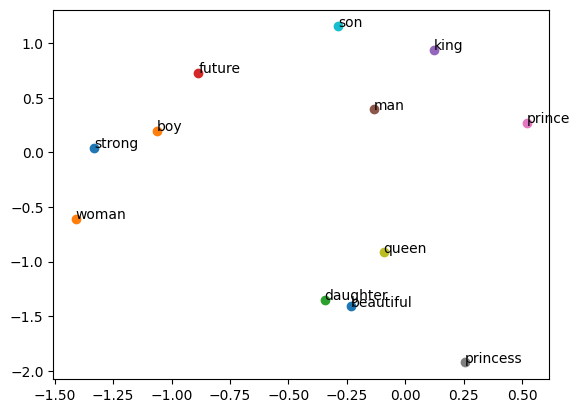

In [19]:
import matplotlib.pyplot as plt

for word in all_words:
  plt.scatter(word_embedding[word][0], word_embedding[word][1])
  plt.annotate(word, (word_embedding[word][0], word_embedding[word][1]))

plt.show()
